In [1]:
import pandas as pd
import numpy as np
import thinkstats2 as tstat # this is the author's package! 

In [2]:
! ls

gss.hdf5                  nsfg.hdf5                 read-clean-validate.ipynb


In [3]:
nsfg = pd.read_hdf('nsfg.hdf5')

In [4]:
nsfg.shape

(9358, 10)

In [5]:
nsfg.columns

Index(['caseid', 'outcome', 'birthwgt_lb1', 'birthwgt_oz1', 'prglngth',
       'nbrnaliv', 'agecon', 'agepreg', 'hpagelb', 'wgt2013_2015'],
      dtype='object')

In [6]:
pounds = nsfg['birthwgt_lb1']

In [7]:
pounds.value_counts().sort_index()

0.0        6
1.0       34
2.0       47
3.0       67
4.0      196
5.0      586
6.0     1666
7.0     2146
8.0     1168
9.0      363
10.0      82
11.0      17
12.0       7
13.0       2
14.0       2
17.0       1
98.0       1
99.0      94
Name: birthwgt_lb1, dtype: int64

In [8]:
pounds.describe() # 99 and 98 indicate nan values, they should be replaced.

count    6485.000000
mean        8.055204
std        11.178893
min         0.000000
25%         6.000000
50%         7.000000
75%         8.000000
max        99.000000
Name: birthwgt_lb1, dtype: float64

In [9]:
pounds = pounds.replace([98,99], np.nan)

In [10]:
pounds.mean()

6.703286384976526

In [11]:
ounces = nsfg["birthwgt_oz1"]

In [12]:
ounces.head()

0     4.0
1    12.0
2     4.0
3     NaN
4    13.0
Name: birthwgt_oz1, dtype: float64

In [13]:
birth_weight = pounds + ounces / 16.0
birth_weight.describe()

count    6390.000000
mean        7.153267
std         1.485002
min         0.000000
25%         6.375000
50%         7.187500
75%         8.000000
max        17.937500
dtype: float64

### Clean and Validate

- `value_counts()`
- `describe()`
- `series.replace([98,99], np.nan, inplace = True)`

How many pregnancies in this dataset ended with a live birth?
- 1. Live birth
- 2. Induced abortion
- 3. Stillbirth
- 4. Miscarriage
- 5. Ectopic pregnancy
- 6. Current pregnancy

In [14]:
nsfg["outcome"].value_counts()

1    6489
4    1469
2     947
6     249
5     118
3      86
Name: outcome, dtype: int64

In [15]:
nsfg['nbrnaliv'].value_counts()

1.0    6379
2.0     100
3.0       5
8.0       1
Name: nbrnaliv, dtype: int64

In [16]:
# 8 means that the respondent refused to answer. 
# This should be replaced with nan

In [17]:
nsfg['nbrnaliv'].replace(8, np.nan, inplace = True)

In [18]:
nsfg['nbrnaliv'].value_counts()

1.0    6379
2.0     100
3.0       5
Name: nbrnaliv, dtype: int64

In [19]:
## checking the age of pregnancy and the age of conception
agecon = nsfg['agecon']/100
agepreg = nsfg['agepreg']/100

In [20]:
preg_length = agepreg - agecon

In [21]:
preg_length.describe()

count    9109.000000
mean        0.552069
std         0.271479
min         0.000000
25%         0.250000
50%         0.670000
75%         0.750000
max         0.920000
dtype: float64

### Filter and Visualize

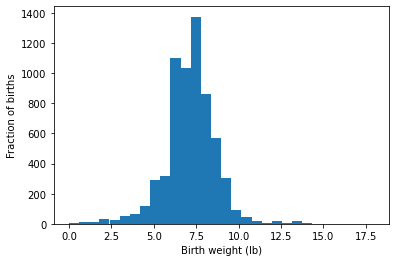

In [22]:
import matplotlib.pyplot as plt

plt.hist(birth_weight.dropna(), bins = 30)
plt.xlabel('Birth weight (lb)')
plt.ylabel('Fraction of births')
plt.show()

In [23]:
preterm = nsfg['prglngth'] < 37
preterm.head()

0    False
1     True
2     True
3     True
4    False
Name: prglngth, dtype: bool

In [24]:
preterm.sum() # number of preterm babies

3742

In [25]:
preterm.mean() # approx 40% of births are preterm

0.39987176747168196

In [26]:
#### Filter

preterm_weight = birth_weight[preterm]
preterm_weight.mean()

5.602043673012318

In [27]:
full_term_weight = birth_weight[~preterm] # ~ symbol means not
full_term_weight.mean()

7.405266509004912

#### Filter on multiple conditions
`&` for AND (both true) <br>
`|` for OR (either or both true)

### Resampling
- NSFG is not representative
- Some groups are "oversampled"
- we can correct using `resample_rows_weighted()` in the course

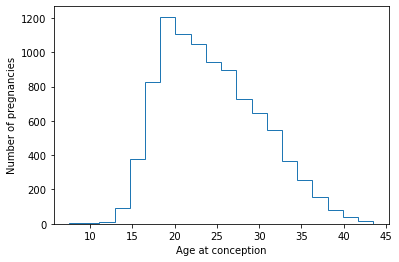

In [28]:

plt.hist(agecon, bins = 20, histtype = 'step')


plt.xlabel('Age at conception')
plt.ylabel('Number of pregnancies')


plt.show()

#### sidenote: 

The course provided a function, resample_rows_weighted, that takes the NSFG data and resamples it using the sampling weights in wgt2013_2015. The result is a sample that is representative of the U.S. population.

Then they extracted birthwgt_lb1 and birthwgt_oz1, replace special codes with NaN, and compute total birth weight in pounds, birth_weight.

##### Resample the data
`nsfg = resample_rows_weighted(nsfg, 'wgt2013_2015')`

##### Clean the weight variables
`pounds = nsfg['birthwgt_lb1'].replace([98, 99], np.nan)` <br>
`ounces = nsfg['birthwgt_oz1'].replace([98, 99], np.nan)`

##### Compute total birth weight
`birth_weight = pounds + ounces/16`

In [29]:
nsfg = tstat.ResampleRowsWeighted(nsfg, 'wgt2013_2015')

In [30]:
pounds = nsfg['birthwgt_lb1'].replace([98, 99], np.nan)
ounces = nsfg['birthwgt_oz1'].replace([98, 99], np.nan)
birth_weight = pounds + ounces/16

In [31]:
full_term = nsfg['prglngth'] >= 37
single = nsfg['nbrnaliv'] == 1

# Compute birth weight for single full-term babies
single_full_term_weight = birth_weight[full_term & single]
print('Single full-term mean:', single_full_term_weight.mean())

# Compute birth weight for multiple full-term babies
mult_full_term_weight = birth_weight[full_term & ~single]
print('Multiple full-term mean:', mult_full_term_weight.mean())


Single full-term mean: 7.442458714772931
Multiple full-term mean: 5.52027027027027


### Probability mass functions

In [32]:
gss = pd.read_hdf('gss.hdf5') # cleaned and validated by course

In [33]:
gss.head()

,year,age,cohort,sex,race,educ,realinc,gunlaw,grass,wtssall
0,1972,26.0,1946.0,1,1,18.0,13537.0,2.0,NaN,0.8893
1,1972,38.0,1934.0,2,1,12.0,18951.0,1.0,NaN,0.4446
2,1972,57.0,1915.0,1,1,12.0,30458.0,1.0,NaN,1.3339
3,1972,61.0,1911.0,2,1,14.0,37226.0,1.0,NaN,0.8893
4,1972,59.0,1913.0,1,1,12.0,30458.0,2.0,NaN,0.8893


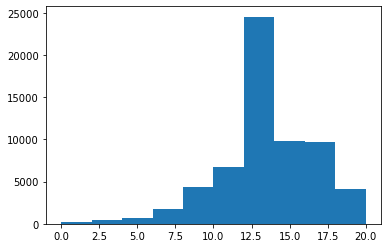

In [34]:
educ = gss['educ']
plt.hist(educ.dropna(), label = 'educ') # bad way to visualize this data.
plt.show()